# Image Cropping 

The objective of this notebook is to crop the input images with a set padding size (pixels). This is to remove Nan values in the image for further processing. 

- Input: .tif files
- Output: .png rgb files (greyscale)

In [1]:
import rasterio 
from rasterio.plot import show
from rasterio.windows import Window
import cv2
import os
import numpy as np

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
def crop_image(image, padding):
    max_height, max_width = image.shape 
    window = Window(
        col_off=padding, 
        row_off=padding, 
        width=max_width-padding*2, 
        height=max_height-padding*2
    )
    return image.read(window=window)

def save_as_greyscale(image, output_file):
    image = image[0]
    greyscale_image = (image - image.min()) / (image.max() - image.min()) * 255 
    rgb = cv2.cvtColor(greyscale_image, cv2.COLOR_GRAY2BGR)
    cv2.imwrite(output_file, rgb)

## Batch Processing

Input Files

In [3]:
input_directory = '/Users/jimuelcelestejr/Documents/codebook/sar-speckle-noise-filtering/data/Sentinel-1_Images'
input_files = []
for file in os.listdir(input_directory):
    name, ext = os.path.splitext(file)
    if ext == '.tif':
        input_files.append(os.path.join(input_directory, file))

Output Files

In [4]:
output_directory = '/Users/jimuelcelestejr/Documents/codebook/sar-speckle-noise-filtering/results/cropped_images'
output_files = []
for file in input_files:
    file = os.path.relpath(file, input_directory)
    name, ext = os.path.splitext(file) 
    file = name + ".png"
    output_files.append(os.path.join(output_directory, file))

Batch Processing

In [5]:
input_output_mapping = list(zip(input_files, output_files))
for input_file, output_file in input_output_mapping:
    image = rasterio.open(input_file) 
    cropped_image = crop_image(image, 100)
    save_as_greyscale(cropped_image, output_file)

## Sample Image 

In [6]:
input_file = '/Users/jimuelcelestejr/Documents/codebook/sar-speckle-noise-filtering/data/Sentinel-1_Images/sentinel-1_image_VH_2018-08-12.tif'
image = rasterio.open(input_file)
cropped_image = crop_image(image, 100)

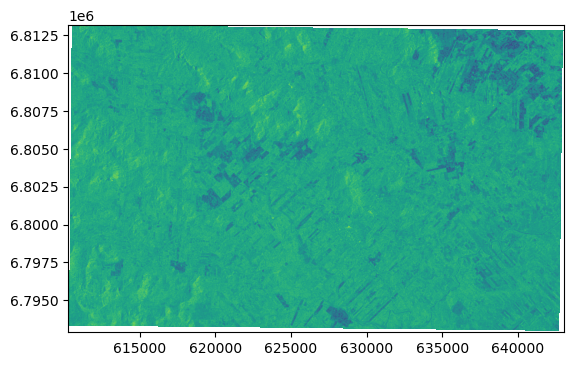

<Axes: >

In [7]:
show(image)

In [8]:
# Nan 
len(image.read(1)[np.isnan(image.read(1))])

162403

162k Nan pixels

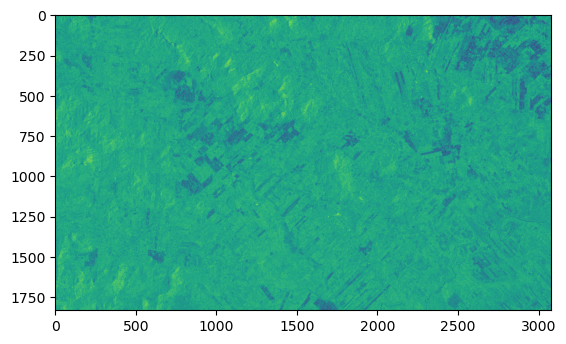

<Axes: >

In [9]:
show(cropped_image)

In [10]:
len(cropped_image[np.isnan(cropped_image)])

0

No nan pixels